## The Stock Market Data


**Library:** *ISLR*

**Data:** *Smarket*


This dataset consists of percentage returns of stock index over 1250 days, from the beginning of 2001 and 2005.
We need to predict direction of stock market "up" or "down" based on this data


In [2]:
require("ISLR")
require("ggplot2")
require("tidyr")

Loading required package: ISLR

Loading required package: ggplot2

Loading required package: tidyr



In [3]:
library(ISLR)
library(ggplot2)
library(tidyr)

In [2]:
data <- ISLR::Smarket

In [6]:
head(data)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [7]:
summary(data)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [9]:
dim(data)

[1] 1250    9

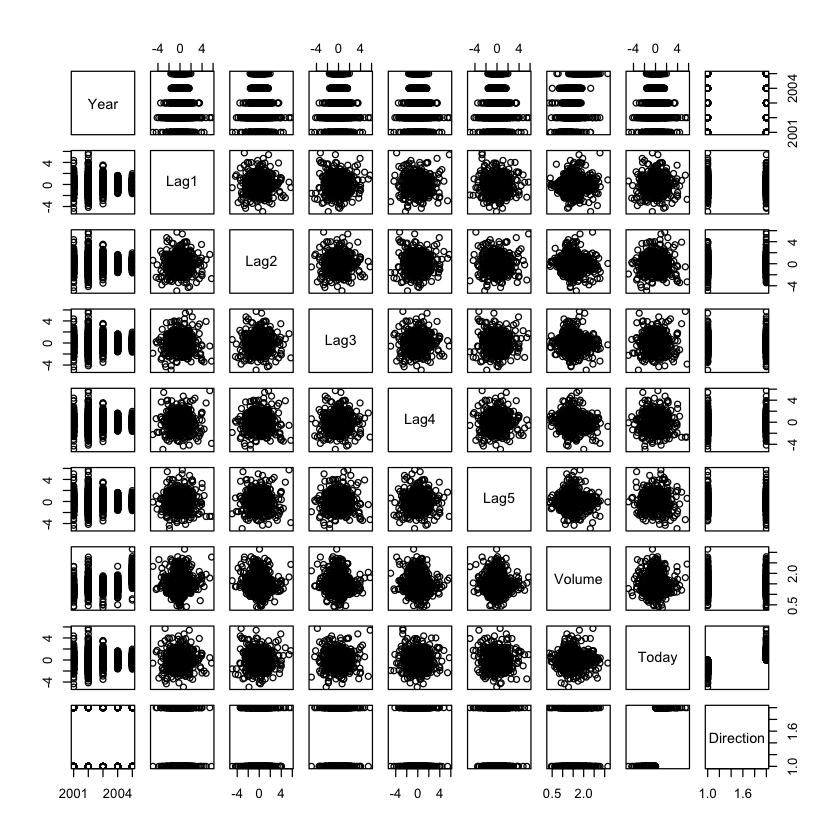

In [11]:
pairs(data)

In [4]:
attach(data)

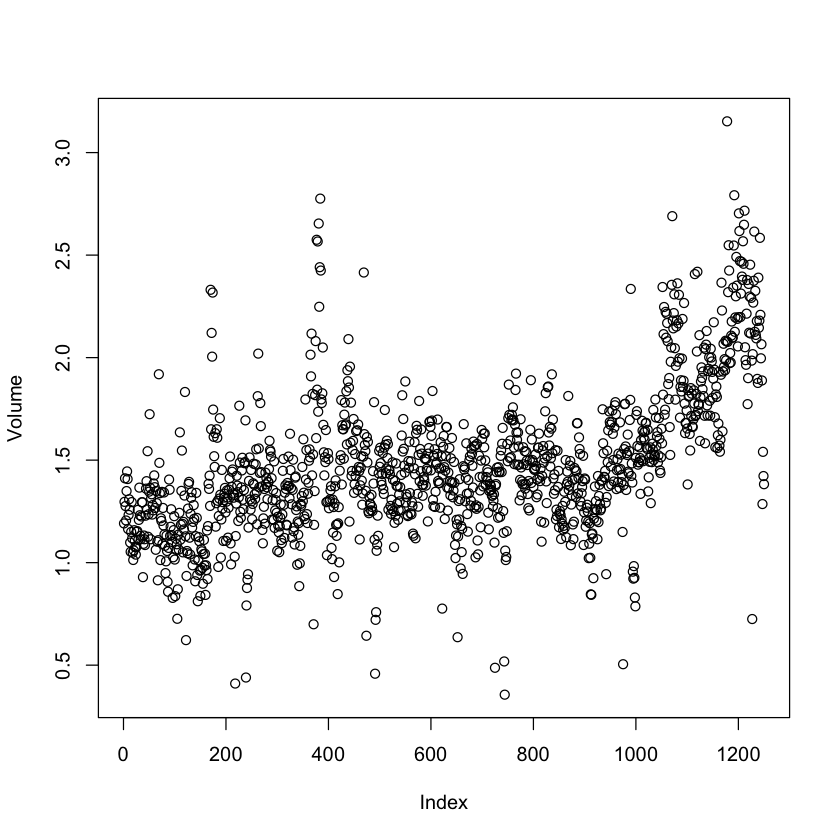

In [14]:
plot(Volume)

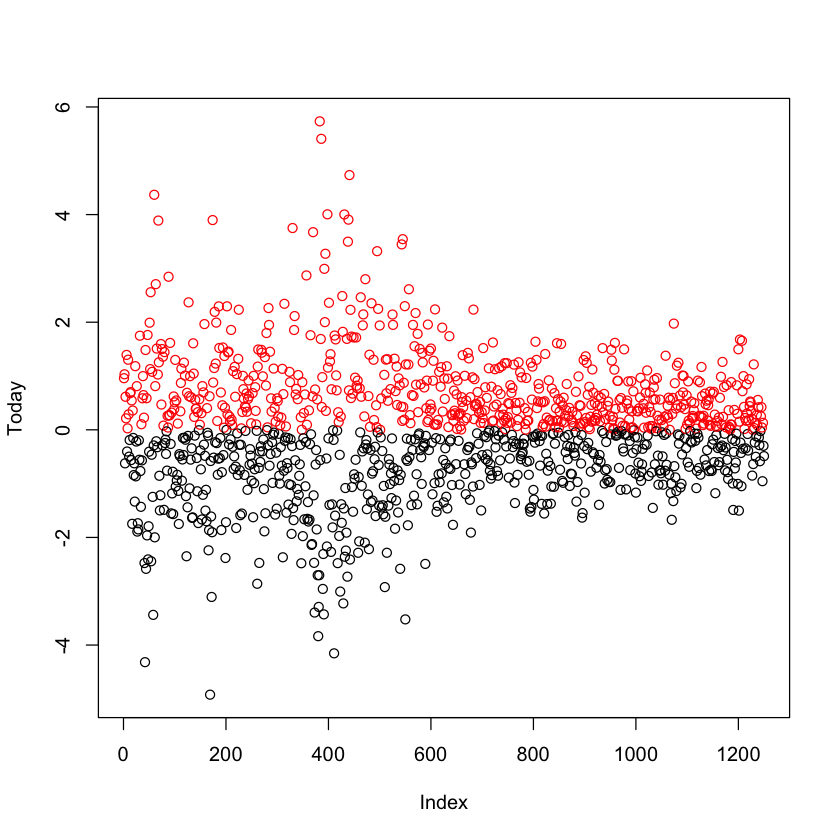

In [26]:
plot(Today, col = factor(Direction))

In [27]:
?plot

In [18]:
cor(data[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


There is a very little correlation between Lag variables and Volume. That is intuitive also, since stock trading is not highly dependent on previous day's percentage returns. There is significant correlation between Year and Volume. So, it seems that volume has increased over the years.

In [20]:
?boxplot.default

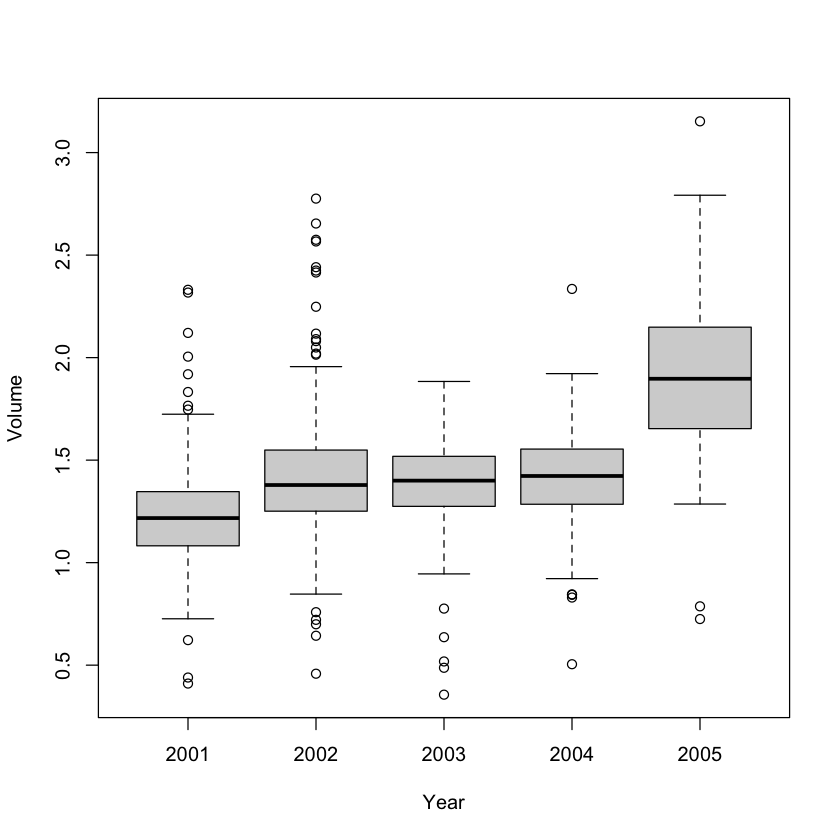

In [22]:
boxplot(Volume~Year, data = data, col = 'lightgrey')

# Logistic Regression

?glm

glm(formula, family = gaussian, data, weights, subset,
    na.action, start = NULL, etastart, mustart, offset,
    control = list(...), model = TRUE, method = "glm.fit",
    x = FALSE, y = TRUE, singular.ok = TRUE, contrasts = NULL, ...)

glm.fit(x, y, weights = rep(1, nobs),
        start = NULL, etastart = NULL, mustart = NULL,
        offset = rep(0, nobs), family = gaussian(),
        control = list(), intercept = TRUE, singular.ok = TRUE)

## S3 method for class 'glm'
weights(object, type = c("prior", "working"), ...)

In [32]:
model = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume+Today, data = data, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [33]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume + Today, family = binomial, data = data)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.002665   0.000000   0.000000   0.000000   0.003186  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -6.335e+01  4.424e+03  -0.014    0.989
Lag1        -7.746e-02  2.887e+02   0.000    1.000
Lag2         6.856e+00  1.849e+03   0.004    0.997
Lag3        -2.780e+00  2.060e+03  -0.001    0.999
Lag4        -2.545e+00  1.393e+03  -0.002    0.999
Lag5         9.457e+00  9.349e+02   0.010    0.992
Volume       5.749e+01  2.244e+03   0.026    0.980
Today        3.327e+03  3.739e+04   0.089    0.929

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.7312e+03  on 1249  degrees of freedom
Residual deviance: 3.7024e-05  on 1242  degrees of freedom
AIC: 16

Number of Fisher Scoring iterations: 25


very poor model

In [34]:
model = glm(Direction~Lag1+Volume+Today, data = data, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [35]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Volume + Today, family = binomial, 
    data = data)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.009048   0.000000   0.000000   0.000000   0.008472  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -145.35    1385.39  -0.105    0.916
Lag1           -3.27      85.89  -0.038    0.970
Volume        105.69    1063.69   0.099    0.921
Today        7500.35   49202.88   0.152    0.879

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.7312e+03  on 1249  degrees of freedom
Residual deviance: 1.6437e-04  on 1246  degrees of freedom
AIC: 8.0002

Number of Fisher Scoring iterations: 25


In [36]:
model = glm(Direction~Lag1+Lag2+Lag3+Volume, data = data, family = binomial)

In [37]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Volume, family = binomial, 
    data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.455  -1.203   1.069   1.146   1.333  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.12267    0.24038  -0.510    0.610
Lag1        -0.07315    0.05017  -1.458    0.145
Lag2        -0.04249    0.05008  -0.848    0.396
Lag3         0.01063    0.04991   0.213    0.831
Volume       0.13324    0.15812   0.843    0.399

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.7  on 1245  degrees of freedom
AIC: 1737.7

Number of Fisher Scoring iterations: 3


Removing the variable "Today" significantly improves the model 

In [38]:
model = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data = data, family = binomial)

In [39]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [40]:
model = glm(Direction~Lag1+Lag2+Volume, data = data, family = binomial)

In [41]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Volume, family = binomial, 
    data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.452  -1.203   1.068   1.146   1.331  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.12058    0.24018  -0.502    0.616
Lag1        -0.07326    0.05017  -1.460    0.144
Lag2        -0.04279    0.05006  -0.855    0.393
Volume       0.13184    0.15799   0.835    0.404

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.7  on 1246  degrees of freedom
AIC: 1735.7

Number of Fisher Scoring iterations: 3


In [42]:
model = glm(Direction~Lag1+Volume, data = data, family = binomial)

In [43]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Volume, family = binomial, data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.416  -1.204   1.075   1.146   1.296  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.12893    0.23987  -0.538    0.591
Lag1        -0.07208    0.05010  -1.439    0.150
Volume       0.13733    0.15778   0.870    0.384

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1728.4  on 1247  degrees of freedom
AIC: 1734.4

Number of Fisher Scoring iterations: 3


In [44]:
pred = predict(model, type = "response")

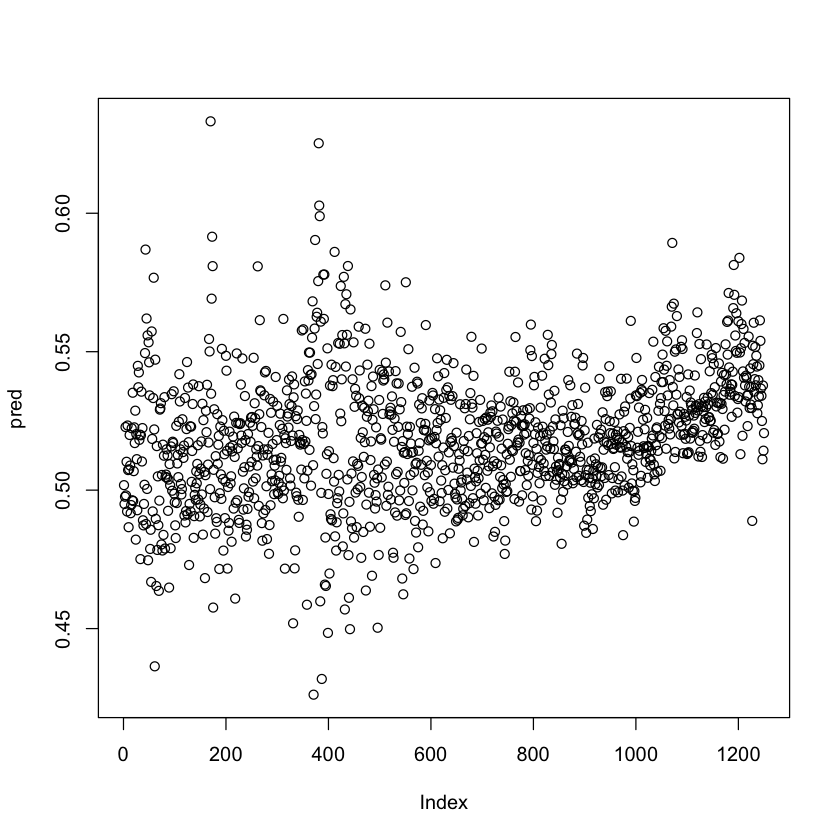

In [47]:
plot(pred)

In [48]:
summary(pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4261  0.5035  0.5177  0.5184  0.5325  0.6332 

mean is 0.5184 that is 51.84% 

In [49]:
contrasts(Direction)

,Up
Down,0
Up,1


In [5]:
train_data = data[Year<2005,]

In [52]:
head(train_data)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [53]:
dim(train_data)

[1] 998   9

In [6]:
test_data <- data[!(Year<2005), ]

In [58]:
dim(test_data)

[1] 252   9

In [7]:
model_train <- glm(Direction~Lag1+Volume, data = train_data, family = binomial)
pred <- predict(model_train, test_data, type = "response")

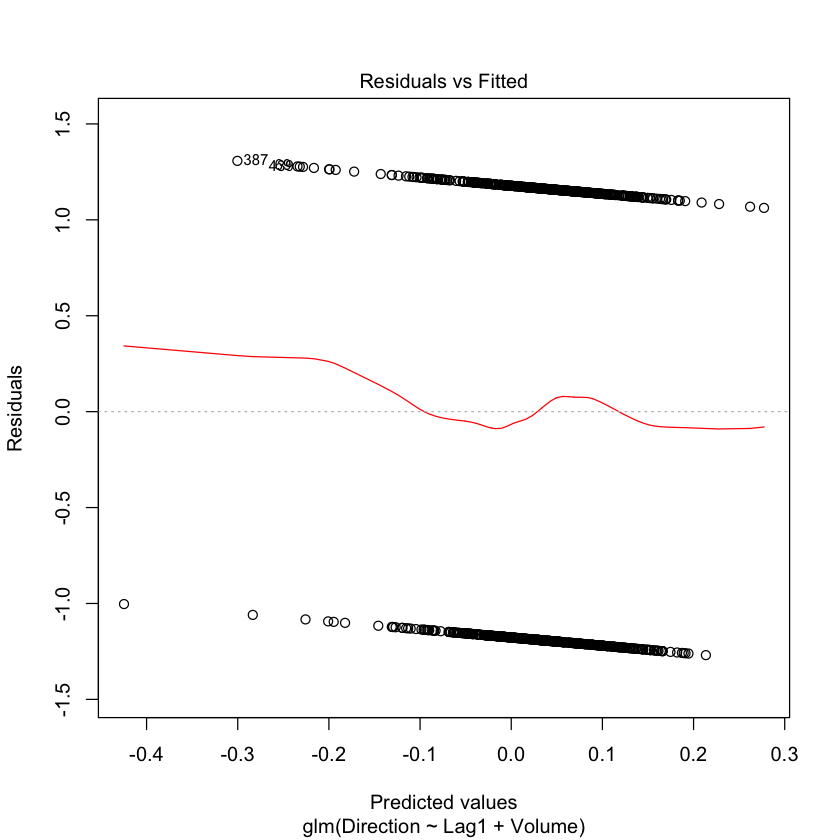

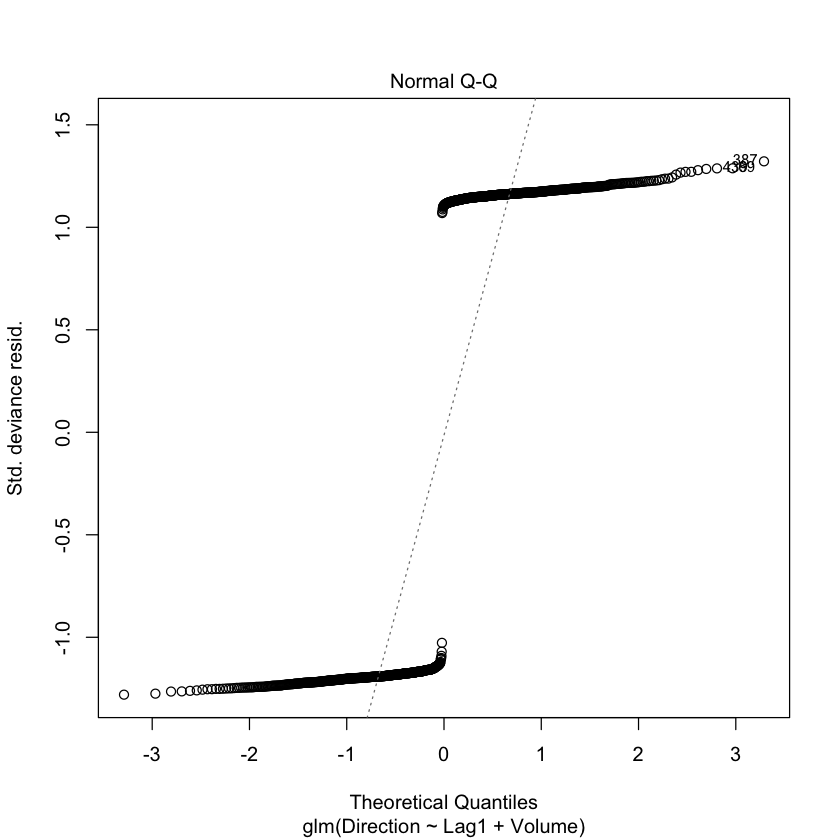

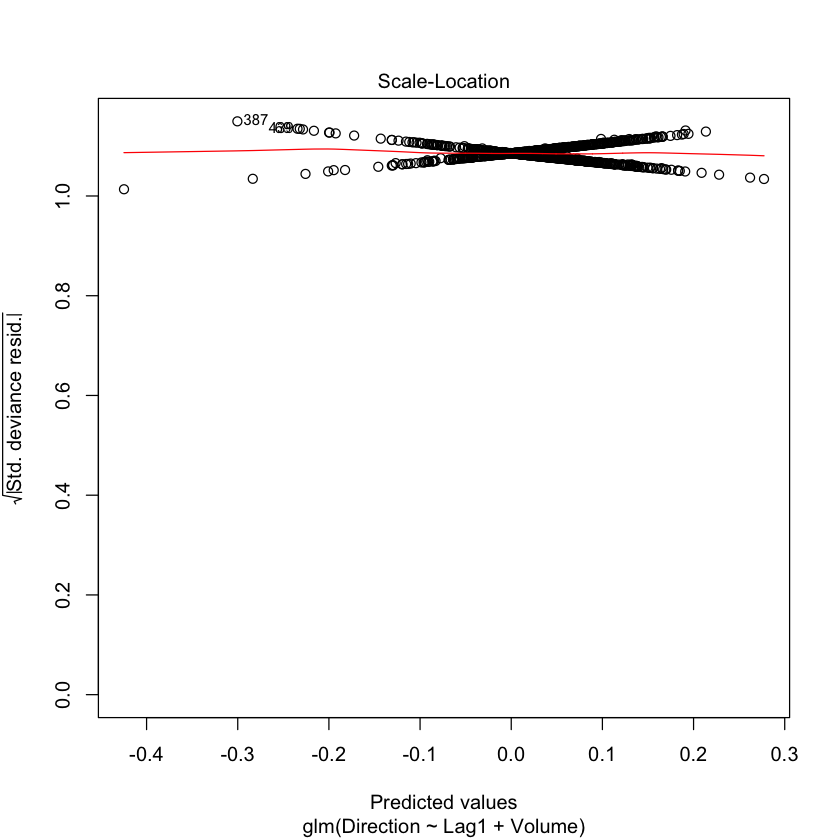

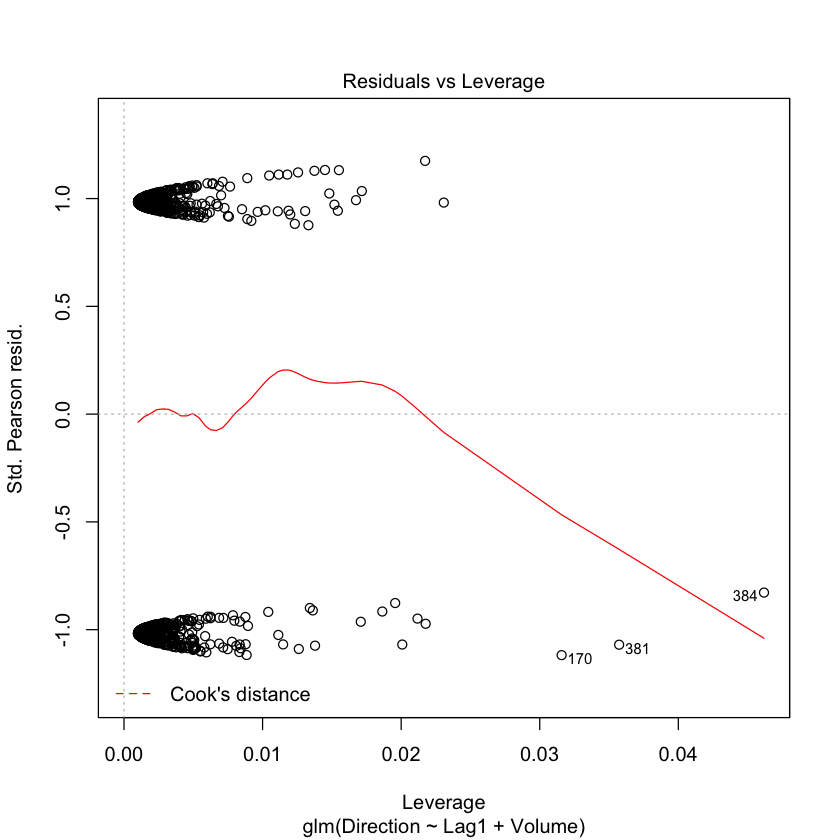

In [8]:
plot(model_train)

In [163]:
prob = rep("Down", 252)
prob[pred > 0.5] = "Up"

In [164]:
mean(prob == test_data$Direction)

[1] 0.515873

##### 51.58% accuracy on the test set;

In [91]:
summary(model_train)


Call:
glm(formula = Direction ~ Lag1 + Volume, family = binomial, data = train_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.269  -1.190   1.102   1.162   1.307  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.17896    0.33084   0.541    0.589
Lag1        -0.05333    0.05174  -1.031    0.303
Volume      -0.10737    0.23747  -0.452    0.651

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.9  on 995  degrees of freedom
AIC: 1387.9

Number of Fisher Scoring iterations: 3


Probabilities of the coefficients and intercepts are quite large. Bad model

**So the Stock market predictions cannot be made with the previous days' returns.** 

Which is also quite expected

Let's try to make this model a bit better though


In [9]:
train_model <- glm(Direction ~ Lag1+Lag2, data = train_data, family = binomial)
pred <- predict(train_model, test_data, type = "response")

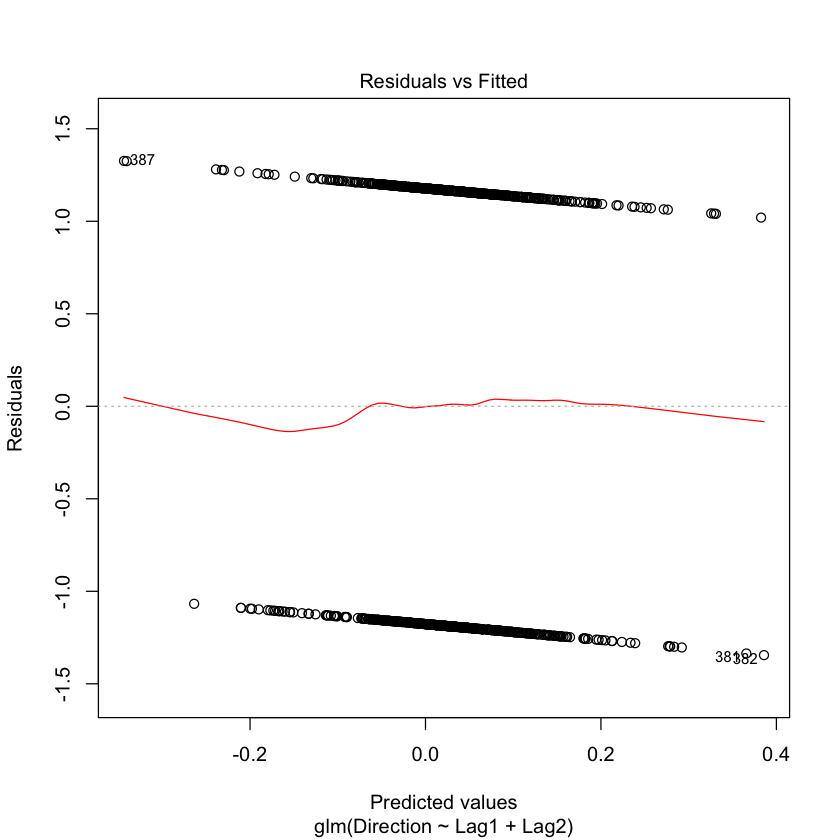

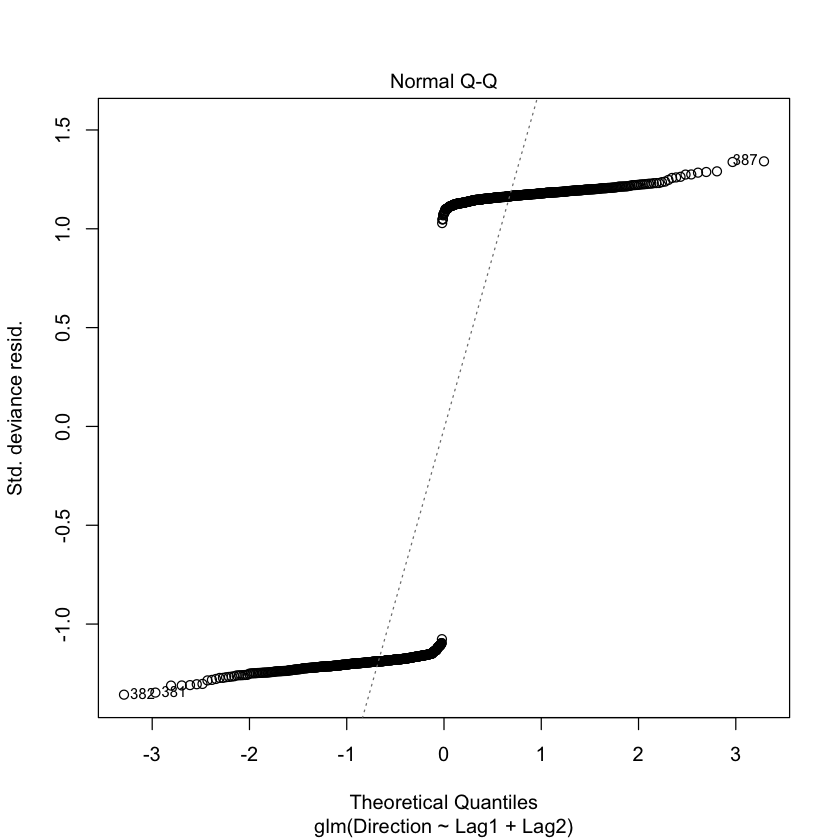

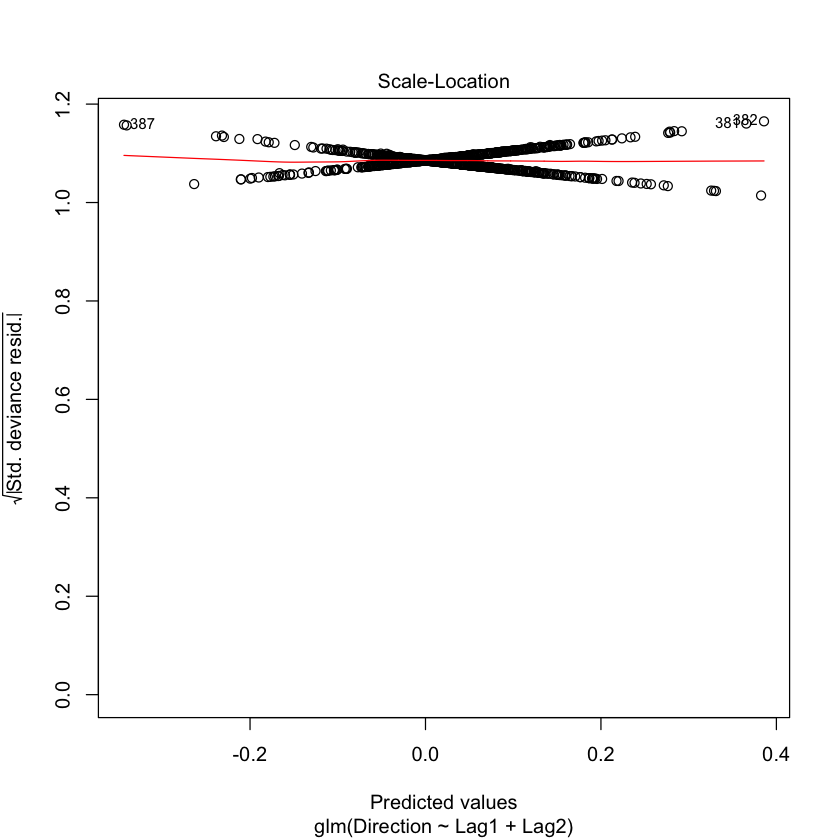

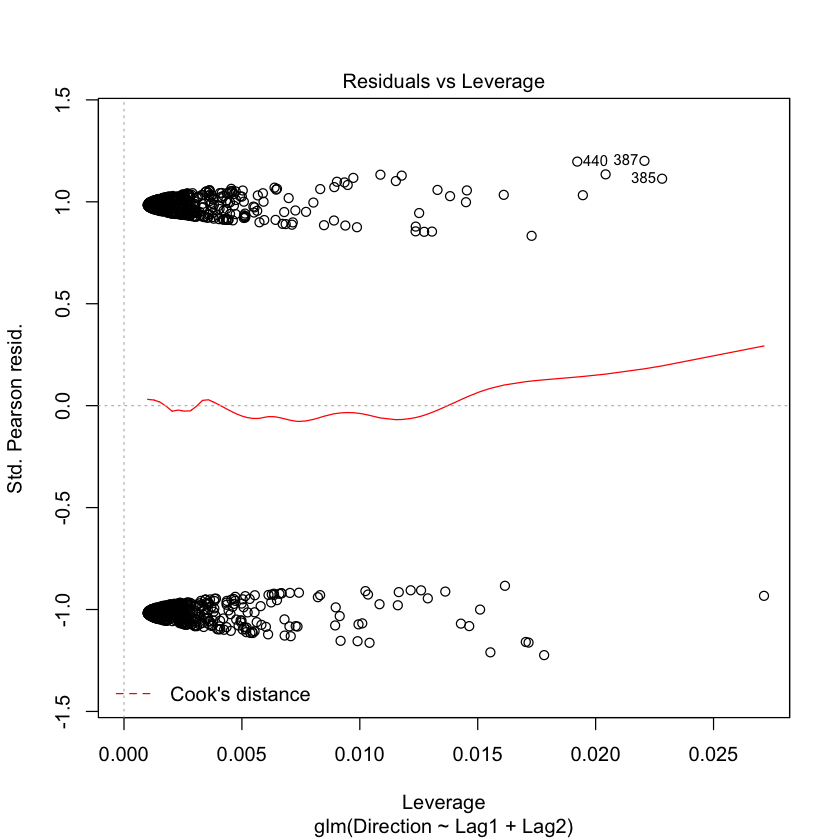

In [10]:
plot(train_model)

In [144]:
summary(pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4797  0.4994  0.5074  0.5077  0.5153  0.5423 

In [145]:
summary(train_model)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = train_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


In [12]:
train <- (Year < 2005)

In [13]:
data.2005 <- data[!train, ]

In [14]:
dim(data.2005)

[1] 252   9

In [15]:
Direction.2005 <- Direction[!train]

In [16]:
model <- glm(Direction~Lag1+Lag2, data = data, family = binomial, subset = train)

In [151]:
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = data, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


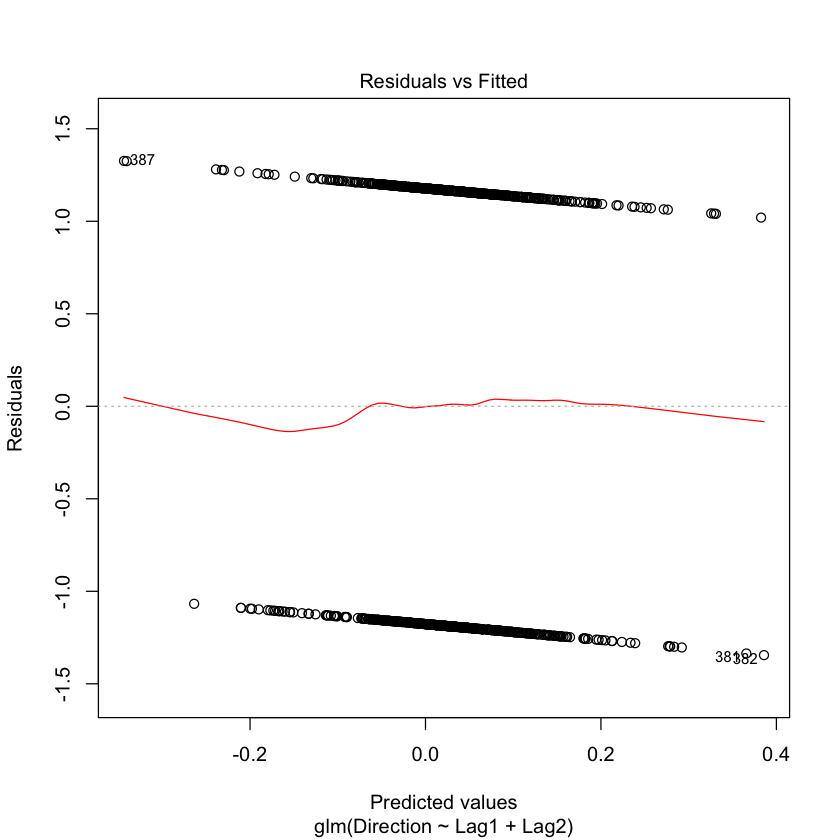

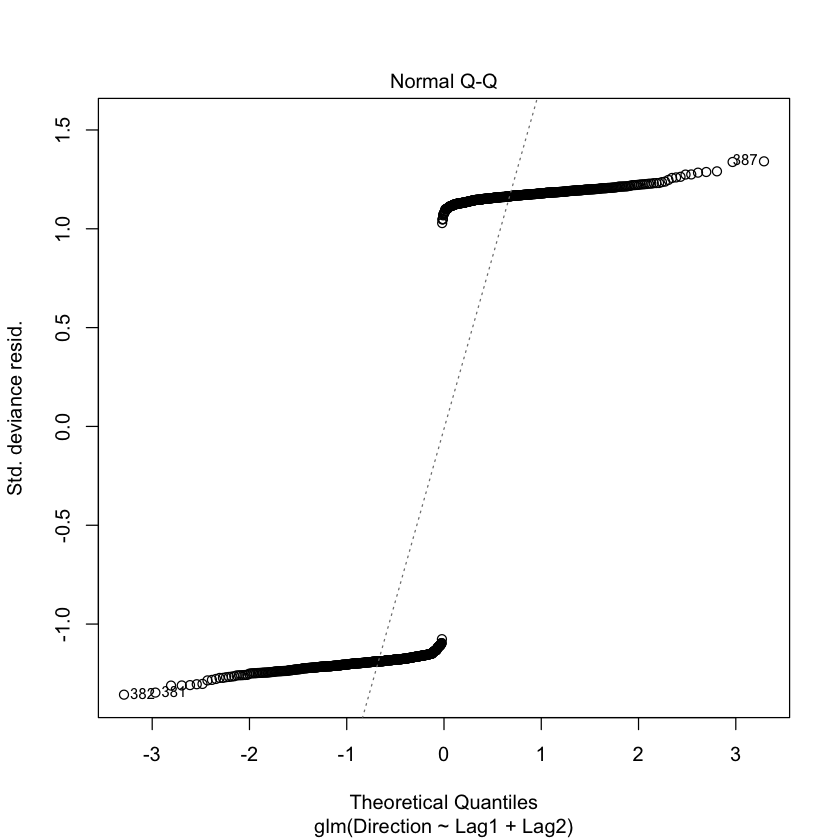

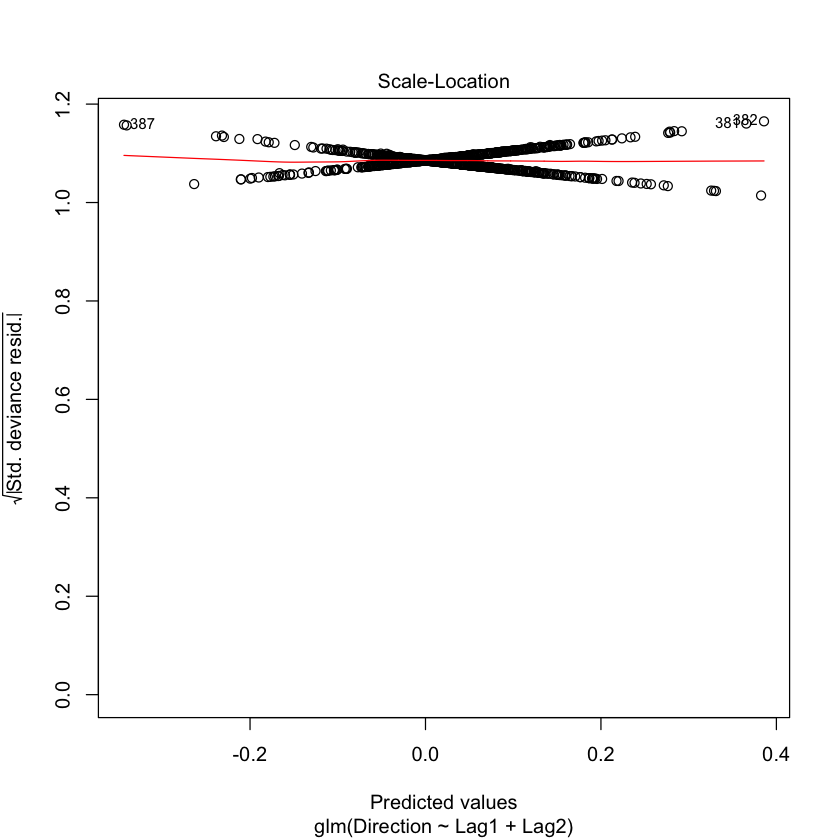

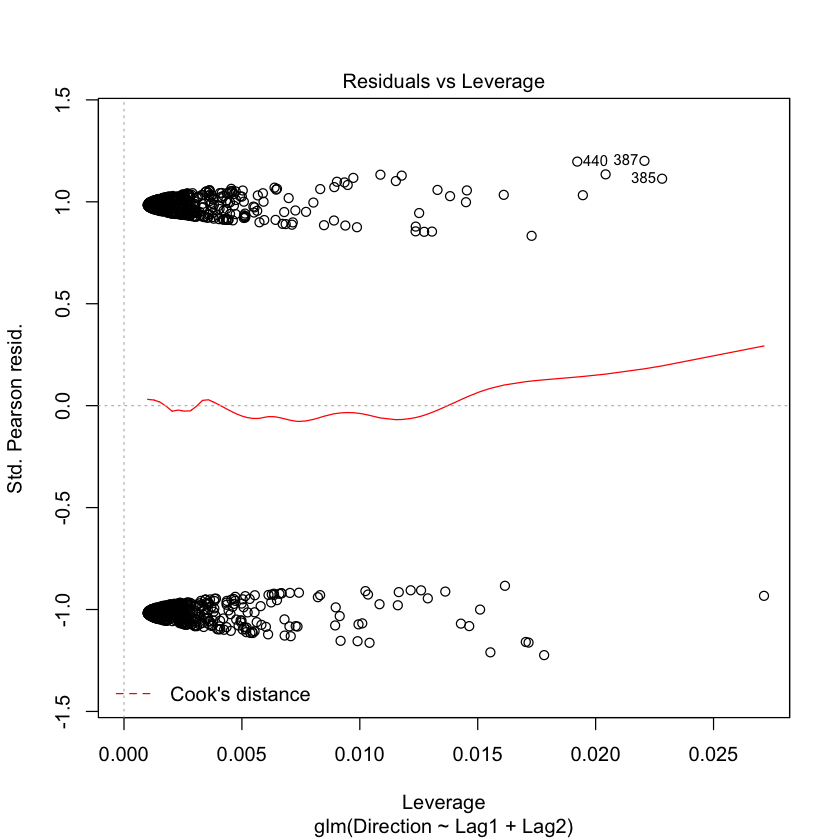

In [17]:
plot(model)

In [142]:
pred <- predict(model, test_data, type = "response")

In [152]:
pred2 <- predict(model,data.2005 , type = "response")

In [155]:
prob1 = rep("Down", dim(test_data)[1])

In [157]:
prob1[pred2 > 0.5] = "Up"

In [159]:
table(prob1, test_data$Direction)

      
prob1  Down  Up
  Down   35  35
  Up     76 106

In [160]:
mean(prob1 == test_data$Direction)

[1] 0.5595238

# 56% accuracy